# Project : Work with 65 years dataset for Rainfall Analysis in Bangladesh.

In [2]:
# importing the necessary libraries

import pandas as pd
import gc
import numpy as np
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score , KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from xgboost import plot_importance
import statsmodels.regression.linear_model as sm

In [3]:
# load the dataset

df = pd.read_csv('65 Years of Weather Data Bangladesh (1948 - 2013).csv')
print('Dataset Size is {0} MB'.format(df.memory_usage().sum()/1024**2))

Dataset Size is 2.7393798828125 MB


In [4]:
df.isnull().sum()

Station Names        0
YEAR                 0
Month                0
Max Temp             0
Min Temp             0
Rainfall             0
Relative Humidity    0
Wind Speed           0
Cloud Coverage       0
Bright Sunshine      0
Station Number       0
X_COR                0
Y_COR                0
LATITUDE             0
LONGITUDE            0
ALT                  0
Period               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 17 columns):
Station Names        21120 non-null object
YEAR                 21120 non-null int64
Month                21120 non-null int64
Max Temp             21120 non-null float64
Min Temp             21120 non-null float64
Rainfall             21120 non-null float64
Relative Humidity    21120 non-null float64
Wind Speed           21120 non-null float64
Cloud Coverage       21120 non-null float64
Bright Sunshine      21120 non-null float64
Station Number       21120 non-null int64
X_COR                21120 non-null float64
Y_COR                21120 non-null float64
LATITUDE             21120 non-null float64
LONGITUDE            21120 non-null float64
ALT                  21120 non-null int64
Period               21120 non-null float64
dtypes: float64(12), int64(4), object(1)
memory usage: 2.7+ MB


In [6]:
df.head().transpose()

,0,1,2,3,4
Station Names,Barisal,Barisal,Barisal,Barisal,Barisal
YEAR,1949,1950,1951,1952,1953
Month,1,1,1,1,1
Max Temp,29.4,30,28.2,26.6,30
Min Temp,12.3,14.1,12.3,12.3,13.3
Rainfall,0,0,0,2,10
Relative Humidity,68,77,77,77,75
Wind Speed,0.453704,0.453704,0.453704,0.453704,0.453704
Cloud Coverage,0.6,0.8,0.6,1,1.6
Bright Sunshine,7.83191,7.83191,7.83191,7.83191,7.83191


In [7]:
# # delete some columns
# new_df = df.drop(['Max Temp' , 'Min Temp' , 'Bright Sunshine' , 'Period'] , axis = 1)
# print('Dataset Size is {0} MB'.format(new_df.memory_usage().sum()/1024**2)

In [8]:
df.columns

Index(['Station Names', 'YEAR', 'Month', 'Max Temp', 'Min Temp', 'Rainfall',
       'Relative Humidity', 'Wind Speed', 'Cloud Coverage', 'Bright Sunshine',
       'Station Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period'],
      dtype='object')

In [9]:
labelencoder_X = LabelEncoder()
df['Station Names']= labelencoder_X.fit_transform(df['Station Names'])

In [10]:
df.head()

,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,0,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,0,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,0,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,0,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


#### Divided the dataset into train and test.

In [11]:
df_train, df_test = train_test_split(df , train_size = 0.75, test_size = 0.25, random_state = 80)

In [12]:
df_train

,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
17095,27,1997,7,32.7,24.1,983.0,92.000000,2.300000,6.6,3.300000,41964,650012.1,488627.9,22.50,91.46,6,1997.07
20004,32,1956,7,35.0,24.6,872.0,87.245614,1.512963,7.1,3.719231,41891,694533.2,752277.9,24.88,91.93,35,1956.07
14671,23,1995,10,34.5,24.8,289.0,85.000000,0.600000,3.8,6.100000,41960,534986.1,472575.7,22.36,90.34,3,1995.10
925,1,1967,4,36.4,22.7,80.0,78.000000,3.100000,3.0,6.948485,41951,567637.6,510271.8,22.70,90.66,5,1967.04
17325,27,1987,12,29.0,16.6,22.0,77.000000,0.700000,1.3,8.000000,41964,650012.1,488627.9,22.50,91.46,6,1987.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,13,1980,10,32.6,24.4,387.0,83.000000,1.300000,2.7,6.493103,41963,616159.2,465295.1,22.29,91.13,4,1980.10
2259,3,1975,3,36.1,19.6,1.0,70.000000,1.000000,0.8,6.889189,41941,568556.9,571945.8,23.26,90.67,7,1975.03
19366,30,2000,12,29.0,11.0,0.0,80.000000,0.300000,1.2,9.500000,41915,675761.6,687095.9,24.29,91.73,23,2000.12
5308,8,1994,10,34.0,24.0,88.0,79.000000,0.800000,2.9,6.900000,41992,705183.0,374324.6,21.46,91.98,4,1994.10


In [13]:
mm_scaler = MinMaxScaler()
features_names = ['Station Names' , 'YEAR' , 'Month' , 'Max Temp' , 'Min Temp' , 'Rainfall' , 'Relative Humidity' , 'Wind Speed' , 'Cloud Coverage' , 'Station Number' , 'X_COR' , 'Y_COR' , 'LATITUDE' , 'LONGITUDE' , 'ALT']
features_names

['Station Names',
 'YEAR',
 'Month',
 'Max Temp',
 'Min Temp',
 'Rainfall',
 'Relative Humidity',
 'Wind Speed',
 'Cloud Coverage',
 'Station Number',
 'X_COR',
 'Y_COR',
 'LATITUDE',
 'LONGITUDE',
 'ALT']

In [14]:
df_train[features_names] = mm_scaler.fit_transform(df_train[features_names])
df_test[features_names] = mm_scaler.fit_transform(df_test[features_names])

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [15]:
x_train = df_train
y_train = df_train.pop('Rainfall')


x_test = df_test
y_test = df_test.pop('Rainfall')

## Check the important columns.

In [16]:
lm = LinearRegression()
rfe = RFE(lm, 9)

In [17]:
rfe = rfe.fit(x_train , y_train)
print(rfe.support_)
print(rfe.ranking_) 

[False False False  True  True  True  True  True  True  True False False
  True  True False False]
[3 8 4 1 1 1 1 1 1 1 5 2 1 1 6 7]


In [18]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=9)             
rfe = rfe.fit(x_train, y_train)

In [19]:
y_pred = rfe.predict(x_test)
ac_mlr = r2_score(y_test, y_pred)
print(ac_mlr*100)

63.39975610973481


Only 63% accuracy.Let's check with cross validation for better result.

In [20]:
lm = LinearRegression()
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
print(np.max(scores))

0.6635429135145086


After doing cross validation the score increase not much.Now do some hyperparameter tunning.

In [21]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1 , 12))}]

In [22]:
# lm = LinearRegression()
# lm.fit(x_train, y_train)        

# model_cv = GridSearchCV(estimator = lm , param_grid = hyper_params, scoring= 'r2', cv = folds, return_train_score=True , n_jobs = -1)      

# model_cv.fit(x_train, y_train)   

#### Now check which columns are important for better result

Using Ordinary Least Squares or OLS to find out the best columns.

In [23]:
new_x_train = x_train
new_x_train = np.append(arr = np.ones((15840 , 1)).astype(int) , values = x_train , axis = 1)
lm_OLS = sm.OLS(endog = y_train , exog = x_train).fit()
lm_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Rainfall   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1944.
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:21:48   Log-Likelihood:                 20057.
No. Observations:               15840   AIC:                        -4.008e+04
Df Residuals:                   15824   BIC:                        -3.996e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Station Names         0.0126      0.002      6.099      0.000       0.009       0.017
YEAR                 -0.0124      0.002     -5.419      0.000      -0.017      -0.008
Month                -0.0086      0.002     -4.167      0.000      -0.013      -0.005
Max Temp              0.0115      0.007      1.658      0.097      -0.002       0.025
Min Temp             -0.0253      0.006     -3.917      0.000      -0.038      -0.013
Relative Humidity     0.0730      0.007     10.358      0.000       0.059       0.087
Wind Speed            0.0706      0.007     10.235      0.000       0.057       0.084
Cloud Coverage        0.2362      0.005     43.318      0.000       0.226       0.247
Bright Sunshine      -0.0158      0.001    -29.469      0.000      -0.017      -0.015
Station Number       -0.1667      0.018     -9.498      0.000      -0.201      -0.132
X_COR                -0.0059      0.018     -0.328      0.743      -0.041       0.029
Y_COR                -0.0107      0.012     -0.879      0.379      -0.035       0.013
LATITUDE             -0.1755      0.020     -8.840      0.000      -0.214      -0.137
LONGITUDE             0.0732      0.010      7.479      0.000       0.054       0.092
ALT                  -0.0006      0.004     -0.163      0.871      -0.008       0.007
Period                0.0001   1.05e-05      9.832      0.000    8.26e-05       0.000
==============================================================================
Omnibus:                     6065.421   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50292.486
Skew:                           1.617   Prob(JB):                         0.00
Kurtosis:                      11.108   Cond. No.                     1.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

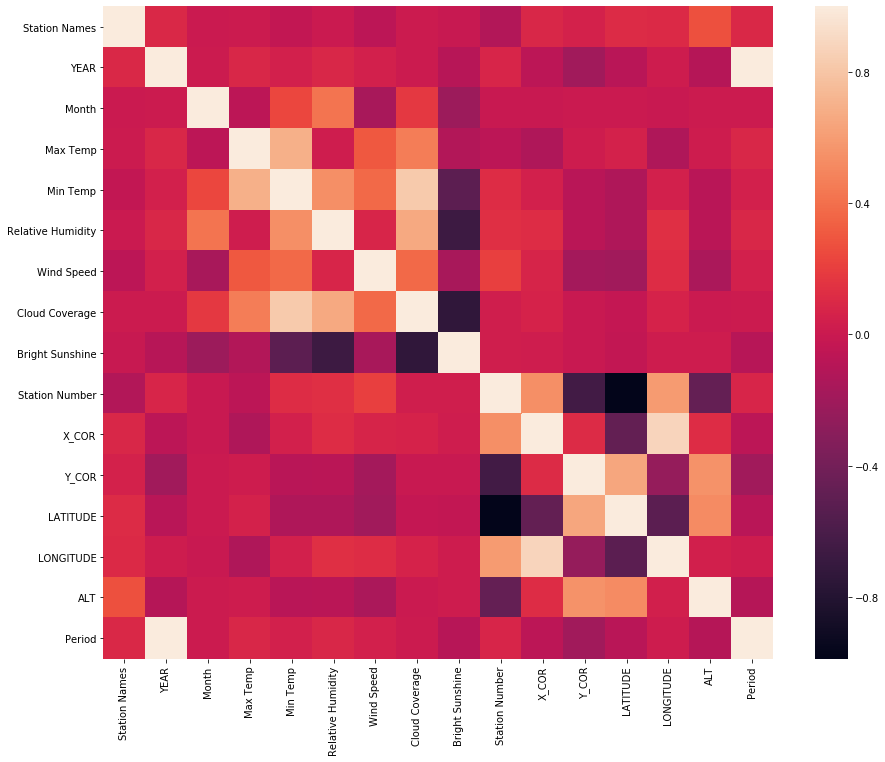

In [24]:
plt.figure(figsize = (15 , 12))
sns.heatmap(x_train.corr())

#### It is a thumb rule that if the P value is greater than 5% than delete those columns.According to that there are 4 columns have high P value and also 3 of them have negetive co-efficient value.So now delete 3 columns


In [25]:
new_x_train = x_train
new_x_train = new_x_train.drop((['X_COR' , 'Y_COR' , 'ALT']) , axis = 1)
new_x_train.head()

,Station Names,YEAR,Month,Max Temp,Min Temp,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,LATITUDE,LONGITUDE,Period
17095,0.794118,0.753846,0.545455,0.446078,0.828704,0.912281,0.205357,0.835443,3.300000,0.757143,0.334016,0.783784,1997.07
20004,0.941176,0.123077,0.545455,0.558824,0.851852,0.828870,0.135086,0.898734,3.719231,0.235714,0.821721,0.910811,1956.07
14671,0.676471,0.723077,0.818182,0.534314,0.861111,0.789474,0.053571,0.481013,6.100000,0.728571,0.305328,0.481081,1995.10
925,0.029412,0.292308,0.272727,0.627451,0.763889,0.666667,0.276786,0.379747,6.948485,0.664286,0.375000,0.567568,1967.04
17325,0.794118,0.600000,1.000000,0.264706,0.481481,0.649123,0.062500,0.164557,8.000000,0.757143,0.334016,0.783784,1987.12


In [26]:
new_x_test = x_test.drop((['X_COR' , 'Y_COR' , 'ALT']) , axis = 1)
new_x_test.shape

(5280, 13)

In [27]:
new_x_trai = np.append(arr = np.ones((15840 , 1)).astype(int) , values = new_x_train , axis = 1)
lm_OLS = sm.OLS(endog = y_train , exog = new_x_train).fit()
lm_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Rainfall   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     2427.
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:21:50   Log-Likelihood:                 20050.
No. Observations:               15840   AIC:                        -4.007e+04
Df Residuals:                   15827   BIC:                        -3.997e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Station Names         0.0128      0.002      6.509      0.000       0.009       0.017
YEAR                 -0.0106      0.002     -4.759      0.000      -0.015      -0.006
Month                -0.0085      0.002     -4.123      0.000      -0.013      -0.004
Max Temp              0.0114      0.007      1.653      0.098      -0.002       0.025
Min Temp             -0.0254      0.006     -3.939      0.000      -0.038      -0.013
Relative Humidity     0.0728      0.007     10.355      0.000       0.059       0.087
Wind Speed            0.0723      0.007     10.536      0.000       0.059       0.086
Cloud Coverage        0.2358      0.005     43.394      0.000       0.225       0.246
Bright Sunshine      -0.0159      0.001    -29.586      0.000      -0.017      -0.015
Station Number       -0.1590      0.017     -9.308      0.000      -0.192      -0.126
LATITUDE             -0.1737      0.018     -9.886      0.000      -0.208      -0.139
LONGITUDE             0.0681      0.003     24.079      0.000       0.063       0.074
Period             9.575e-05   9.64e-06      9.937      0.000    7.69e-05       0.000
==============================================================================
Omnibus:                     6066.222   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50360.299
Skew:                           1.617   Prob(JB):                         0.00
Kurtosis:                      11.115   Cond. No.                     8.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

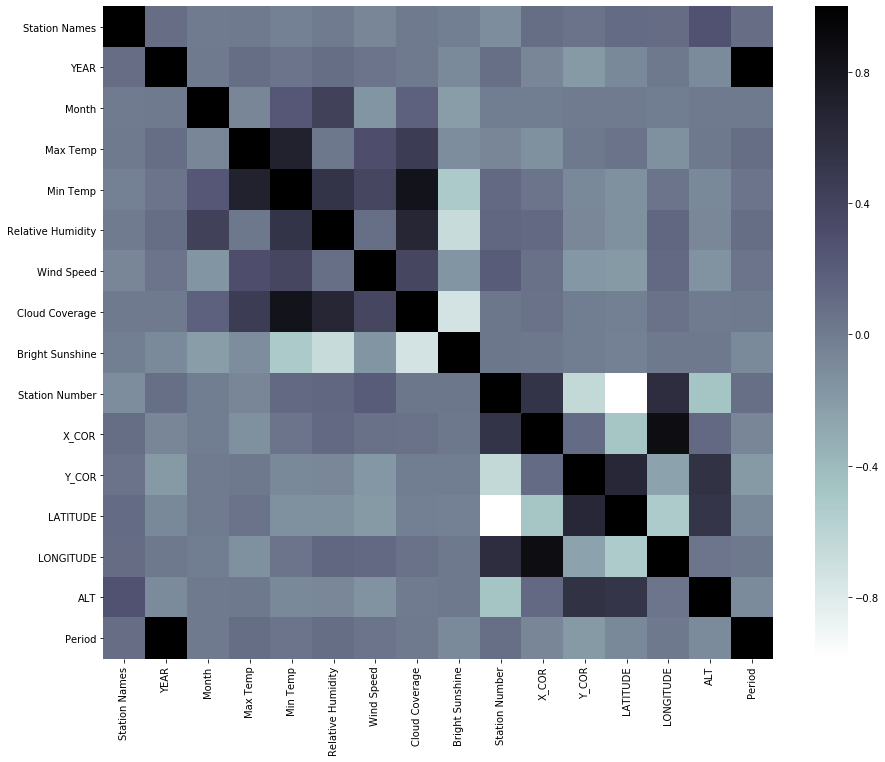

In [28]:
plt.figure(figsize = (15 , 12))
sns.heatmap(x_train.corr() , cmap = 'bone_r')

## Apply Different ML model

### Simple Linear Regression

In [28]:
new_x_tr = x_train.pop('YEAR')
new_x_tr1 = x_train.pop('X_COR')
new_x_tr2 = x_train.pop('ALT')

new_x_ts = x_test.pop('YEAR')
new_x_ts1 = x_test.pop('X_COR')
new_x_ts2 = x_test.pop('ALT')

In [29]:
lm = LinearRegression()
lm.fit(new_x_train, y_train)

y1 = lm.predict(new_x_test)
print(r2_score(y_test , y1))

0.6349438814948298


In [30]:
print('After Cross validation: ')
lm = LinearRegression()
new_scores = cross_val_score(lm, new_x_train , y_train, scoring='r2', cv=5)
print(np.max(new_scores*100))

After Cross validation: 
66.3060409851114


### KNN

In [31]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(new_x_train , y_train)

y_pred_knn = knn.predict(new_x_test)

ac = r2_score(y_test , y_pred_knn)
print(ac*100)

61.892284801318034


In [32]:
knn = KNeighborsRegressor()
scores = cross_val_score(knn, new_x_train, y_train, cv=200)
print(np.max(scores))

0.8358621972328679


In [33]:
n_folds = 5
parameters = {
        'n_neighbors': range (2 , 50 , 2)
        }

In [34]:
knn = KNeighborsRegressor()

tree = GridSearchCV(estimator = knn , param_grid = parameters , cv = n_folds , n_jobs = -1)
tree.fit(new_x_train , y_train)

score1 = tree.cv_results_

print(pd.DataFrame(score1).head())
print(tree.best_params_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.035107      0.001466         0.090159        0.003128   
1       0.034507      0.003191         0.099201        0.003459   
2       0.034108      0.002779         0.103790        0.003129   
3       0.031714      0.001933         0.108309        0.002999   
4       0.036701      0.002632         0.113995        0.004544   

  param_n_neighbors               params  split0_test_score  \
0                 2   {'n_neighbors': 2}           0.572361   
1                 4   {'n_neighbors': 4}           0.624458   
2                 6   {'n_neighbors': 6}           0.639465   
3                 8   {'n_neighbors': 8}           0.640211   
4                10  {'n_neighbors': 10}           0.641253   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.599910           0.592338           0.625821           0.647351   
1           0.642307           0.641524           0.6620

In [35]:
## Apply with best neighbors

knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(new_x_train , y_train)

y_pred_knn = knn.predict(new_x_test)

ac_knn = r2_score(y_test , y_pred_knn)
print('After Cross-validation: ',ac*100)

After Cross-validation:  61.892284801318034


## SVR

In [32]:
sv = SVR()
sv.fit(new_x_train , y_train)

y_pred_svm = sv.predict(new_x_test)

ac_svr = r2_score(y_test , y_pred_svm)
print(ac_svr*100)

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


66.5494244343518


In [33]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
params = {"C": [0.01 , 0.1, 1, 10, 100, 1000]}

model = SVR()

model_cv_C = GridSearchCV(estimator = model, param_grid = params, cv = folds , verbose = 1 , return_train_score=True , n_jobs = -1)
model_cv_C.fit(new_x_train, y_train) 


cv_results = pd.DataFrame(model_cv_C.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.0min finished
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.022414,0.343665,0.331940,0.056718,0.01,{'C': 0.01},0.397791,0.381452,0.405470,0.403581,...,0.396389,0.008564,6,0.400617,0.403622,0.399743,0.401770,0.401059,0.401362,0.001307
1,3.065777,0.290700,0.282849,0.060349,0.1,{'C': 0.1},0.530212,0.509054,0.532071,0.536664,...,0.524680,0.010575,5,0.541015,0.537634,0.533521,0.538161,0.533727,0.536812,0.002846
2,3.111012,0.070024,0.201213,0.011166,1,{'C': 1},0.650827,0.636741,0.643196,0.661134,...,0.645043,0.010022,3,0.675562,0.677126,0.658938,0.671981,0.660698,0.668861,0.007590
3,7.528882,0.468263,0.215718,0.011808,10,{'C': 10},0.688645,0.678862,0.686986,0.691906,...,0.684870,0.005518,1,0.729184,0.736069,0.726694,0.730001,0.725379,0.729466,0.003697
4,50.623259,0.945836,0.321266,0.047193,100,{'C': 100},0.668912,0.642169,0.648490,0.655813,...,0.650550,0.011074,2,0.736241,0.733384,0.734962,0.735611,0.732595,0.734558,0.001366
5,257.561536,37.439251,0.277712,0.055418,1000,{'C': 1000},0.611701,0.565392,0.564632,0.583515,...,0.577852,0.018435,4,0.725138,0.719607,0.726754,0.726009,0.723515,0.724205,0.002539


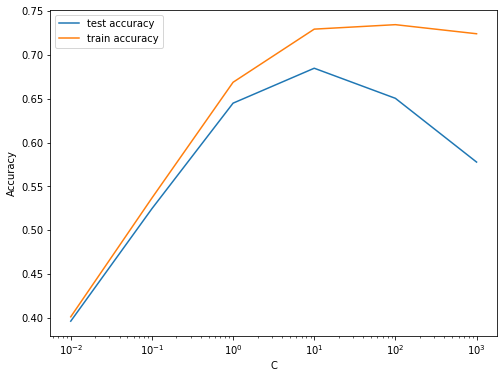

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [35]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
gamma = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

model = SVR()

model_cv_g = GridSearchCV(estimator = model, param_grid = gamma, cv = folds , verbose = 1 , return_train_score=True , n_jobs = -1)
model_cv_g.fit(new_x_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   29.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [36]:
cv_results = pd.DataFrame(model_cv_g.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.778649,0.121756,0.720519,0.039064,1,{'gamma': 1},0.425790,0.420249,0.422716,0.439162,...,0.427836,0.006753,5,0.568365,0.565216,0.566069,0.571024,0.567216,0.567578,0.002024
1,3.067517,0.065019,0.209879,0.007200,0.1,{'gamma': 0.1},0.645598,0.631399,0.646294,0.659184,...,0.641877,0.011548,2,0.678263,0.678432,0.667342,0.674804,0.661152,0.671999,0.006751
2,1.926216,0.119298,0.210940,0.039245,0.01,{'gamma': 0.01},0.663627,0.641768,0.664288,0.671650,...,0.658406,0.010710,1,0.663214,0.669046,0.665991,0.659175,0.664532,0.664392,0.003251
3,1.758457,0.020999,0.210834,0.009139,0.001,{'gamma': 0.001},0.625607,0.597526,0.622700,0.631122,...,0.617772,0.011901,3,0.617833,0.622803,0.617821,0.615615,0.620153,0.618845,0.002445
4,1.983930,0.056248,0.234683,0.031082,0.0001,{'gamma': 0.0001},0.525482,0.504694,0.528655,0.537771,...,0.522311,0.011435,4,0.518936,0.528911,0.520720,0.523509,0.521345,0.522684,0.003440


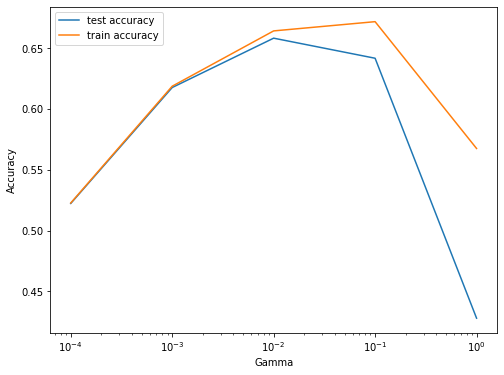

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_gamma'], cv_results['mean_test_score'])
plt.plot(cv_results['param_gamma'], cv_results['mean_train_score'])
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [38]:
print(model_cv_C.best_params_)
print(model_cv_g.best_params_)

{'C': 10}
{'gamma': 0.01}


In [40]:
sv = SVR(C = 10 , gamma = 0.01 , kernel = 'rbf')
sv.fit(new_x_train , y_train)

y_pred_svm = sv.predict(new_x_test)

ac_svr = r2_score(y_test , y_pred_svm)
print(ac_svr*100)

68.74508062517677


## Decision Tree

In [28]:
dt = DecisionTreeRegressor()
dt.fit(new_x_train , y_train)

y_pred_dt = dt.predict(new_x_test)

ac = dt.score(new_x_test , y_test)
print(ac*100)

56.73879542997631


In [29]:
n_folds = 5
parameters = {'min_samples_split': range(5, 200, 10)}

dtree = DecisionTreeRegressor(random_state = 100)

tree_split = GridSearchCV(dtree, parameters , cv=n_folds , n_jobs = -1)
tree_split.fit(new_x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=100,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_split': range(5, 200, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
n_folds = 10
parameters = {
        'min_samples_leaf': range (1 , 20),
        'max_depth':range (1,20)
        }

dt = DecisionTreeRegressor(random_state = 100)

tree_dt = GridSearchCV(dt , parameters , cv = n_folds , n_jobs = -1)
tree_dt.fit(new_x_train , y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=100,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None,

In [31]:
print(tree_dt.best_params_)
print(tree_split.best_params_)

{'max_depth': 8, 'min_samples_leaf': 18}
{'min_samples_split': 115}


In [35]:
dt = DecisionTreeRegressor(max_depth = 8 , min_samples_leaf = 18 , min_samples_split = 155)
dt.fit(x_train , y_train)


y_pred_dt = dt.predict(x_test)

ac = r2_score(y_test , y_pred_dt)
print(ac*100)

73.46130199750023


## Bagging

In [28]:
rf = RandomForestRegressor()
rf.fit(new_x_train , y_train)

y_pred_rf = rf.predict(new_x_test)

ac_rf = r2_score(y_test , y_pred_rf)
print(ac_rf*100)

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


76.41322496750726


In [29]:
n_folds = 5
parameters = {'max_features':[1,2,3,4,5,6,7,8,9]}

rf = RandomForestRegressor(random_state = 100)
grd_search_max_ft = GridSearchCV(rf , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)

grd_search_max_ft.fit(new_x_train, y_train)
print('Best parameter for max_depth: ',grd_search_max_ft.best_params_)

scores = grd_search_max_ft.cv_results_
pd.DataFrame(scores).head()

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best parameter for max_depth:  {'max_features': 4}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.274517,0.012826,0.016926,0.003539,1,{'max_features': 1},0.751764,0.758243,0.759734,0.771806,...,0.761261,0.006709,7,0.957781,0.957606,0.958144,0.957687,0.955962,0.957436,0.000759
1,0.369488,0.004888,0.015114,0.003141,2,{'max_features': 2},0.755326,0.762768,0.759951,0.777035,...,0.765308,0.007876,5,0.957789,0.958489,0.959212,0.958836,0.957637,0.958393,0.000602
2,0.474757,0.004182,0.015724,0.000774,3,{'max_features': 3},0.760369,0.772767,0.762098,0.771234,...,0.767735,0.005359,2,0.959586,0.958724,0.959240,0.958895,0.957444,0.958778,0.000730
3,0.575489,0.005806,0.013780,0.002675,4,{'max_features': 4},0.755338,0.772298,0.756352,0.785047,...,0.769049,0.011549,1,0.958800,0.959091,0.959082,0.958929,0.957242,0.958629,0.000702
4,0.670564,0.004424,0.015519,0.000749,5,{'max_features': 5},0.750939,0.761884,0.769953,0.773786,...,0.765582,0.008339,4,0.959947,0.959484,0.958198,0.959215,0.957802,0.958929,0.000804


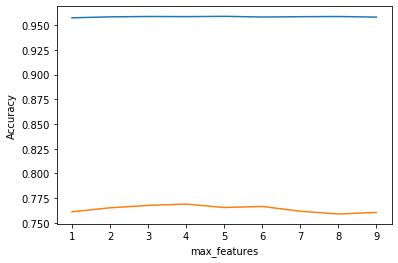

In [32]:
plt.figure()
plt.plot(scores["param_max_features"],scores["mean_train_score"],label="Training accuracy")
plt.plot(scores["param_max_features"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()

In [33]:
n_folds = 10
parameters = {'max_depth': range(2, 30, 2)}

rf = RandomForestRegressor(random_state = 100)
grd_search_max = GridSearchCV(rf , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)

grd_search_max.fit(new_x_train, y_train)
print('Best parameter for max_depth: ',grd_search_max.best_params_)

scores = grd_search_max.cv_results_
pd.DataFrame(scores).head()

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best parameter for max_depth:  {'max_depth': 8}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.219593,0.021798,0.004908,0.001083,2,{'max_depth': 2},0.624965,0.617468,0.621014,0.653850,...,0.637917,0.635598,0.640664,0.641963,0.636707,0.638956,0.631982,0.640134,0.638551,0.002913
1,0.401289,0.020661,0.004454,0.001301,4,{'max_depth': 4},0.709785,0.708615,0.709906,0.759070,...,0.738083,0.736093,0.735704,0.739180,0.737002,0.733291,0.731299,0.736146,0.736449,0.002619
2,0.636987,0.054290,0.005629,0.005560,6,{'max_depth': 6},0.740624,0.748702,0.741970,0.774348,...,0.786533,0.782617,0.781244,0.783463,0.781043,0.779818,0.781620,0.784112,0.782875,0.001918
3,0.846344,0.049395,0.005741,0.000990,8,{'max_depth': 8},0.745263,0.761891,0.752317,0.783659,...,0.831179,0.827570,0.826723,0.829768,0.826477,0.825875,0.826337,0.827383,0.827823,0.001598
4,1.025809,0.060394,0.006978,0.002483,10,{'max_depth': 10},0.742341,0.761547,0.752981,0.778898,...,0.875356,0.873228,0.872764,0.875286,0.873350,0.872493,0.873091,0.872772,0.873766,0.001061


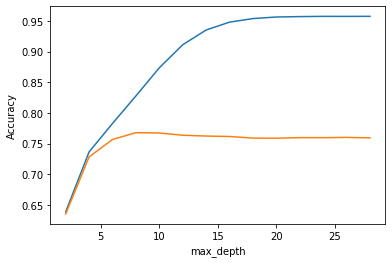

In [34]:
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="Training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [36]:
n_folds = 5
parameters = {'n_estimators': range(50, 500, 50)}

rf = RandomForestRegressor(random_state = 100)
grd_search_est = GridSearchCV(rf , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)

grd_search_est.fit(new_x_train, y_train)
print('Best parameter for n_estimators: ',grd_search_est.best_params_)

scores = grd_search_est.cv_results_
pd.DataFrame(scores).head()

Best parameter for n_estimators:  {'n_estimators': 300}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.124767,0.278763,0.098012,0.007563,50,{'n_estimators': 50},0.763977,0.779081,0.770648,0.793486,...,0.777369,0.009924,9,0.968892,0.968501,0.967950,0.967606,0.968074,0.968205,0.000447
1,18.875876,0.281227,0.160423,0.011279,100,{'n_estimators': 100},0.765616,0.781998,0.773575,0.793266,...,0.779260,0.009261,8,0.970177,0.969468,0.969171,0.968433,0.969086,0.969267,0.000567
2,27.205378,0.230425,0.243986,0.019193,150,{'n_estimators': 150},0.767914,0.781997,0.774726,0.794883,...,0.780586,0.009048,7,0.970639,0.969971,0.969769,0.969092,0.969580,0.969810,0.000507
3,36.934141,1.809428,0.308841,0.040775,200,{'n_estimators': 200},0.767657,0.782857,0.774981,0.795523,...,0.780916,0.009329,6,0.970989,0.970123,0.970076,0.969344,0.969770,0.970060,0.000541
4,44.135208,0.695094,0.380948,0.048141,250,{'n_estimators': 250},0.768028,0.782918,0.775735,0.795812,...,0.781342,0.009261,5,0.971135,0.970282,0.970392,0.969706,0.970114,0.970326,0.000467


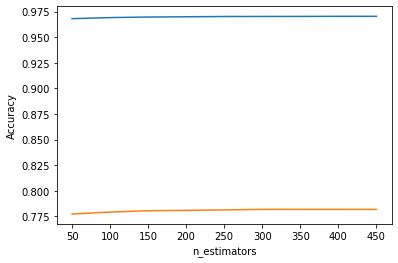

In [37]:
plt.figure()
plt.plot(scores["param_n_estimators"],scores["mean_train_score"],label="Training accuracy")
plt.plot(scores["param_n_estimators"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [38]:
n_folds = 5
parameters = {'min_samples_leaf': range(30, 400, 50)}

rf = RandomForestRegressor(random_state = 100)
grd_search_lf = GridSearchCV(rf , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)

grd_search_lf.fit(new_x_train, y_train)
print('Best parameter for min_samples_leaf: ',grd_search_lf.best_params_)

scores = grd_search_lf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best parameter for min_samples_leaf:  {'min_samples_leaf': 30}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.785778,0.025835,0.018130,0.016034,30,{'min_samples_leaf': 30},0.755194,0.768860,0.761995,0.771085,...,0.765299,0.005928,1,0.801916,0.798804,0.798922,0.796224,0.796086,0.798390,0.002140
1,0.704203,0.120343,0.008696,0.001427,80,{'min_samples_leaf': 80},0.736546,0.755193,0.743323,0.757281,...,0.749056,0.007871,2,0.770242,0.767489,0.762229,0.760123,0.763013,0.764619,0.003698
2,0.772250,0.045236,0.008883,0.002594,130,{'min_samples_leaf': 130},0.721080,0.745239,0.731881,0.746101,...,0.736487,0.009277,3,0.752417,0.749353,0.747644,0.745305,0.744740,0.747892,0.002804
3,0.527732,0.076377,0.007998,0.001179,180,{'min_samples_leaf': 180},0.712942,0.736921,0.718782,0.734697,...,0.725909,0.009138,4,0.741150,0.736114,0.731469,0.733502,0.729634,0.734374,0.004015
4,0.472363,0.007700,0.007184,0.000396,230,{'min_samples_leaf': 230},0.703561,0.727851,0.708208,0.726337,...,0.717240,0.009727,5,0.732624,0.725519,0.723337,0.721807,0.721136,0.724885,0.004152


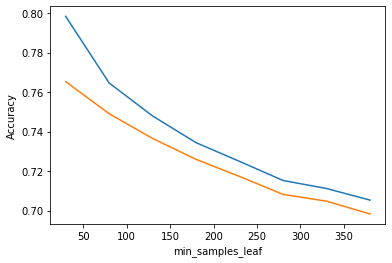

In [39]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="Training accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()

In [40]:
n_folds = 5
parameters = {'min_samples_split': range(10, 400, 50)}

rf = RandomForestRegressor()
grd_search_sp = GridSearchCV(rf , parameters , cv = n_folds , n_jobs = -1)

grd_search_sp.fit(x_train, y_train)
print('Best parameter for min_samples_split: ',grd_search_sp.best_params_)

scores = grd_search_sp.cv_results_
pd.DataFrame(scores).head()

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best parameter for min_samples_split:  {'min_samples_split': 60}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.550245,0.018099,0.013012,0.001090,10,{'min_samples_split': 10},0.747818,0.772612,0.759115,0.779881,0.766288,0.765143,0.011053,2
1,1.169047,0.203155,0.009151,0.000888,60,{'min_samples_split': 60},0.760100,0.770572,0.758769,0.779036,0.769570,0.767610,0.007453,1
2,1.077562,0.136772,0.008723,0.001242,110,{'min_samples_split': 110},0.749375,0.770613,0.762825,0.772977,0.765634,0.764285,0.008269,3
3,0.864421,0.009599,0.011856,0.004745,160,{'min_samples_split': 160},0.743867,0.762212,0.754445,0.763225,0.763824,0.757514,0.007618,4
4,0.918556,0.020027,0.009445,0.002865,210,{'min_samples_split': 210},0.735900,0.754150,0.748490,0.761173,0.755353,0.751013,0.008564,5


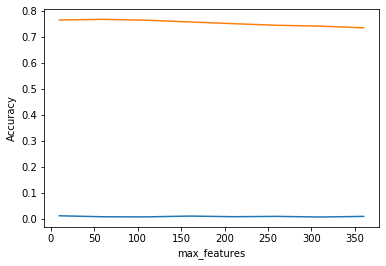

In [42]:
plt.figure()
plt.plot(scores["param_min_samples_split"],scores["mean_score_time"],label="Training accuracy")
plt.plot(scores["param_min_samples_split"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()

In [43]:
print('Best parameter for max_features: ',grd_search_max_ft.best_params_)
print('Best parameter for max_depth: ',grd_search_max.best_params_)
print('Best parameter for min_samples_leaf: ',grd_search_lf.best_params_)
print('Best parameter for min_samples_split: ',grd_search_sp.best_params_)
print('Best parameter for n_estimators: ',grd_search_est.best_params_)

Best parameter for max_features:  {'max_features': 4}
Best parameter for max_depth:  {'max_depth': 8}
Best parameter for min_samples_leaf:  {'min_samples_leaf': 30}
Best parameter for min_samples_split:  {'min_samples_split': 60}
Best parameter for n_estimators:  {'n_estimators': 300}


In [49]:
rf = RandomForestRegressor(n_estimators = 300 , max_depth = 8 , min_samples_leaf = 30 , max_features = 6 , min_samples_split = 60)
rf.fit(x_train , y_train)

y_pred_rf = rf.predict(x_test)

ac_rf = r2_score(y_test , y_pred_rf)
print(ac_rf*100)

75.95978611415669


## AdaBoost

In [28]:
shallow_tree = DecisionTreeRegressor()
shallow_tree.fit(new_x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
y_pred = shallow_tree.predict(new_x_test)
ac_ab = r2_score(y_test, y_pred)
print(ac_ab*100)

57.563202595133234


In [30]:
estimators = list(range(10 , 1000, 50))


abc_scores_est = []
for n_est in estimators:
    ABC = AdaBoostRegressor(base_estimator=shallow_tree  , n_estimators = n_est)
    
    ABC.fit(new_x_train, y_train)
    y_pred_est = ABC.predict(new_x_test)
    score = r2_score(y_test, y_pred_est)
    abc_scores_est.append(score)
    

print(np.max(abc_scores_est)*100)

78.90056922456095


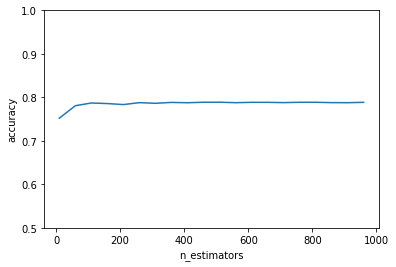

In [31]:
plt.plot(estimators, abc_scores_est)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.50, 1])
plt.show()

In [32]:
learn_rate = {'learning_rate': [0.001 , 0.01 , 0.1 , 1.0 , 1.3]}
folds = 5

ABC = AdaBoostRegressor(base_estimator=shallow_tree)
grid_search_lr = GridSearchCV(ABC, cv = folds , param_grid = learn_rate , n_jobs = -1)
grid_search_lr.fit(x_train, y_train)
print('Best parameter for min_samples_leaf: ',grid_search_lr.best_params_)

Best parameter for min_samples_leaf:  {'learning_rate': 1.3}


In [33]:
max_dpth = {'base_estimator__max_depth': [3,4,5,8,10,12]}
folds = 5

ABC = AdaBoostRegressor(base_estimator = shallow_tree)
grid_search_ab_max = GridSearchCV(ABC, cv = folds , param_grid = max_dpth , n_jobs = -1)
grid_search_ab_max.fit(x_train, y_train)
print('Best parameter for max_depth: ',grid_search_ab_max.best_params_)

Best parameter for max_depth:  {'base_estimator__max_depth': 12}


In [38]:
ABC = AdaBoostRegressor(base_estimator = shallow_tree , learning_rate = 1.3 , n_estimators = 100)
ABC.fit(new_x_train , y_train)
y_pred_ab = ABC.predict(new_x_test)
ac_ab = r2_score(y_test , y_pred_ab)
print(ac_ab*100)

78.55921844629272


## GBDT

In [32]:
learn_rate = {'learning_rate': [0.001 , 0.01 , 0.1 , 1.0 , 1.3]}
folds = 5

GBC = GradientBoostingRegressor()

grd_search_lr = GridSearchCV(GBC , cv = folds , param_grid = learn_rate , n_jobs = -1)
grd_search_lr.fit(new_x_train, y_train)
print('Best parameter for max_depth: ',grd_search_lr.best_params_)

cv_results = pd.DataFrame(grd_search_lr.cv_results_)
cv_results.head()

Best parameter for max_depth:  {'learning_rate': 0.1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.312345,0.024824,0.016401,0.002132,0.001,{'learning_rate': 0.001},0.121011,0.120247,0.120031,0.123559,0.118812,0.120732,0.001580,5
1,2.168264,0.148637,0.011703,0.003219,0.01,{'learning_rate': 0.01},0.602713,0.607097,0.608617,0.623604,0.606660,0.609738,0.007202,4
2,1.814236,0.034542,0.014127,0.004217,0.1,{'learning_rate': 0.1},0.765078,0.774711,0.777902,0.792317,0.783794,0.778761,0.009093,1
3,1.772523,0.014634,0.010220,0.000290,1,{'learning_rate': 1.0},0.732201,0.743442,0.738753,0.769215,0.758065,0.748335,0.013466,2
4,1.597346,0.324241,0.010805,0.002540,1.3,{'learning_rate': 1.3},0.717219,0.731426,0.716660,0.733579,0.743030,0.728383,0.010128,3


In [33]:
sub_sample = {"subsample": [0.3, 0.6, 0.9]}
folds = 5

GBC = GradientBoostingRegressor()

grd_search_ss = GridSearchCV(GBC , cv = folds , param_grid = sub_sample , n_jobs = -1)
grd_search_ss.fit(x_train, y_train)
print('Best parameter for max_depth: ',grd_search_ss.best_params_)

Best parameter for max_depth:  {'subsample': 0.9}


In [36]:
GBC = GradientBoostingRegressor(max_depth = 8 , subsample = 0.9 , learning_rate = 0.1 , n_estimators=50 , max_features = 8 , min_samples_leaf = 30 , min_samples_split = 10)
GBC.fit(x_train , y_train)
y_gbr = GBC.predict(x_test)
ac_gbr = r2_score(y_test , y_gbr)
print(ac_gbr*100)

79.74135874576616


## XGBOOST

In [37]:
from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier.fit(new_x_train, y_train)
y_pred = classifier.predict(new_x_test)
ac_xg = r2_score(y_test , y_pred)
print(ac_xg*100)

79.28028532922494
